## 数字图像处理大作业基本题
**李溢 2016011235**

2019/5/25

---

### 仿射变换
1. 前向映射仿射变换
2. 后向映射仿射变换
3. 灰度插值

### 图像编码
1. Huffman 编码
2. 香农-法诺编码

#### 5.1 仿射变换——前向映射

In [1]:
# 5.前向仿射变换
# liyi, 2019/5/23

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

img = cv2.imread('img/Lena.bmp')
height, width, _ = img.shape   # (256, 256, 3)
Height, Width = round(height*1.5), round(width*1.5)
img_src = np.zeros((Height, Width, 3)).astype(np.uint8)
img_src[Height//2-height//2:Height//2+height//2, Width//2-width//2:Width//2+width//2, :] = img
# print(img_src.shape)

# 平移
Tx = 30   # 竖直方向
Ty = 50   # 水平方向
A = np.array([[1, 0, Tx],
              [0, 1, Ty],
              [0, 0, 1]])
img_trans = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(height):
    for w in range(width):
        h_, w_, _ = np.matmul(A, [h-height//2, w-width//2, 1]).astype(int)
        img_trans[h_+Height//2, w_+Width//2, :] = img[h, w, :]

# 大放缩
Sx1 = 0.8
Sy1 = 1.2
A = np.array([[Sx1, 0, 0],
              [0, Sy1, 0],
              [0,  0, 1]])
img_scale1 = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(height):
    for w in range(width):
        h_, w_, _ = np.matmul(A, [h-height//2, w-width//2, 1]).astype(int)
        img_scale1[h_+Height//2, w_+Width//2, :] = img[h, w, :]
        
# 小放缩
Sx2 = 0.6
Sy2 = 0.8
A = np.array([[Sx2, 0, 0],
              [0, Sy2, 0],
              [0,  0, 1]])
img_scale2 = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(height):
    for w in range(width):
        h_, w_, _ = np.matmul(A, [h-height//2, w-width//2, 1]).astype(int)
        img_scale2[h_+Height//2, w_+Width//2, :] = img[h, w, :]

# 旋转
theta = np.pi/6
A = np.array([[np.cos(theta), np.sin(theta), 0],
              [-np.sin(theta), np.cos(theta), 0],
              [0,  0, 1]])
img_rotate = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(height):
    for w in range(width):
        h_, w_, _ = np.matmul(A, [h-height//2, w-width//2, 1]).astype(int)
        img_rotate[h_+Height//2, w_+Width//2, :] = img[h, w, :]


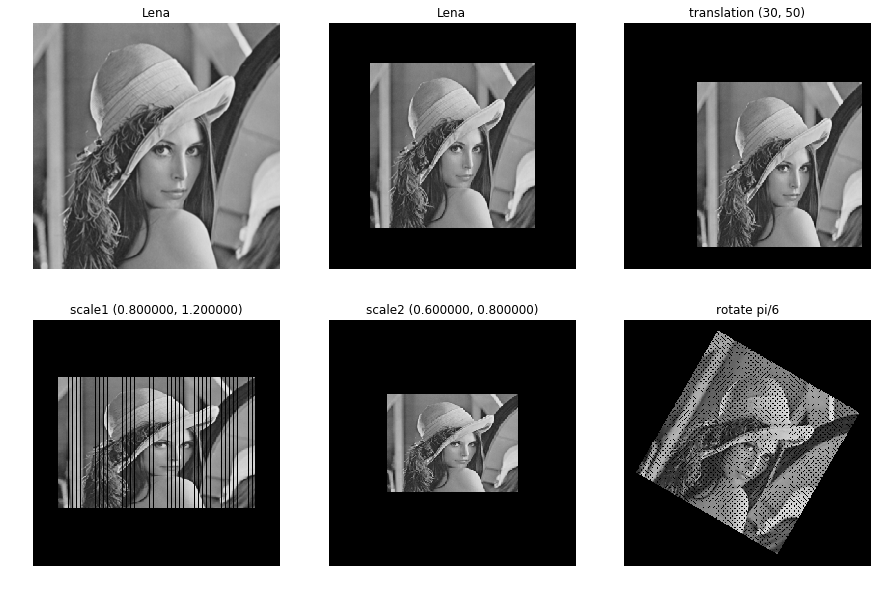

In [2]:
# 前向仿射变换画图
# liyi， 2019/5/24

plt.figure(figsize=(15,10))
plt.subplot(2,3,1).set_title('Lena')
plt.imshow(img)
plt.axis('off')

plt.subplot(2,3,2).set_title('Lena')
plt.imshow(img_src)
plt.axis('off')

plt.subplot(2,3,3).set_title('translation (%d, %d)'%(Tx,Ty))
plt.imshow(img_trans)
plt.axis('off')

plt.subplot(2,3,4).set_title('scale1 (%f, %f)'%(Sx1,Sy1))
plt.imshow(img_scale1)
plt.axis('off')

plt.subplot(2,3,5).set_title('scale2 (%f, %f)'%(Sx2,Sy2))
plt.imshow(img_scale2)
plt.axis('off')

plt.subplot(2,3,6).set_title('rotate pi/6')
plt.imshow(img_rotate)
plt.axis('off')

plt.savefig('img/affine1.png')

#### 5.2 仿射变换——后向映射

In [3]:
# 5.后向仿射变换
# liyi, 2019/5/24

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

img = cv2.imread('img/Lena.bmp')
height, width, _ = img.shape   # (256, 256, 3)
Height, Width = round(height*1.5), round(width*1.5)
img_src = np.zeros((Height, Width, 3)).astype(np.uint8)
img_src[Height//2-height//2:Height//2+height//2, Width//2-width//2:Width//2+width//2, :] = img
# print(img_src.shape)

# 平移
Tx = 30   # 竖直方向
Ty = 50   # 水平方向
A = np.array([[1, 0, -Tx],
              [0, 1, -Ty],
              [0, 0, 1]])
img_trans = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_, w_, _ = np.matmul(A, [h-Height//2, w-Width//2, 1]).astype(int)
        h_ += height//2
        w_ += width//2
        if h_>=0 and h_<height and w_>=0 and w_<width:
            img_trans[h, w, :] = img[h_, w_, :]

# 大放缩
Sx = 0.8
Sy = 1.2
A = np.array([[1/Sx, 0, 0],
              [0, 1/Sy, 0],
              [0,  0, 1]])
img_scale1 = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_, w_, _ = np.matmul(A, [h-Height//2, w-Width//2, 1]).astype(int)
        h_ += height//2
        w_ += width//2
        if h_>=0 and h_<height and w_>=0 and w_<width:
            img_scale1[h, w, :] = img[h_, w_, :]
        
# 小放缩
Sx = 0.6
Sy = 0.8
A = np.array([[1/Sx, 0, 0],
              [0, 1/Sy, 0],
              [0,  0, 1]])
img_scale2 = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_, w_, _ = np.matmul(A, [h-Height//2, w-Width//2, 1]).astype(int)
        h_ += height//2
        w_ += width//2
        if h_>=0 and h_<height and w_>=0 and w_<width:
            img_scale2[h, w, :] = img[h_, w_, :]

# 旋转
theta = np.pi/6
A = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta), np.cos(theta), 0],
              [0,  0, 1]])
img_rotate = np.zeros((Height, Width, 3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_, w_, _ = np.matmul(A, [h-Height//2, w-Width//2, 1]).astype(int)
        h_ += height//2
        w_ += width//2
        if h_>=0 and h_<height and w_>=0 and w_<width:
            img_rotate[h, w, :] = img[h_, w_, :]


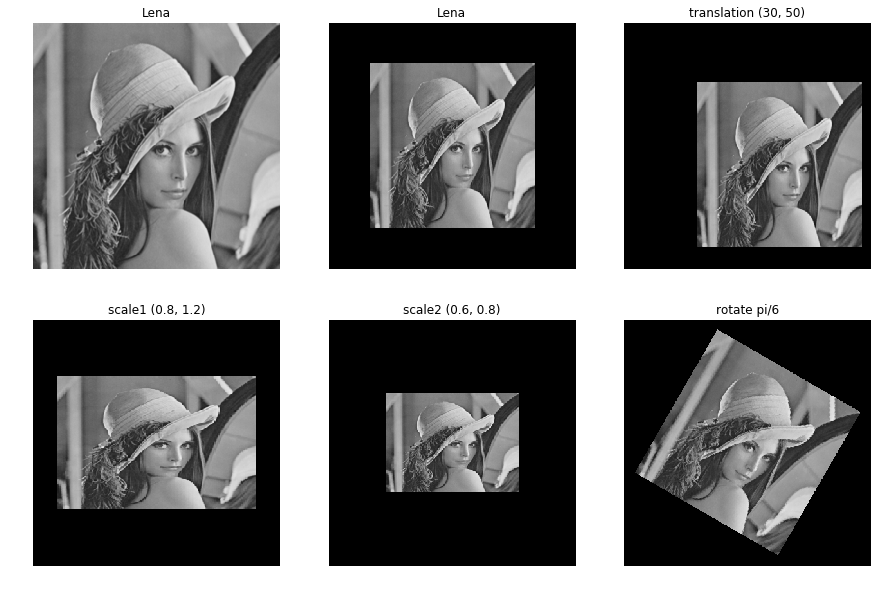

In [4]:
# 后向仿射变换画图
# liyi， 2019/5/24

plt.figure(figsize=(15,10))
plt.subplot(2,3,1).set_title('Lena')
plt.imshow(img)
plt.axis('off')

plt.subplot(2,3,2).set_title('Lena')
plt.imshow(img_src)
plt.axis('off')

plt.subplot(2,3,3).set_title('translation (30, 50)')
plt.imshow(img_trans)
plt.axis('off')

plt.subplot(2,3,4).set_title('scale1 (0.8, 1.2)')
plt.imshow(img_scale1)
plt.axis('off')

plt.subplot(2,3,5).set_title('scale2 (0.6, 0.8)')
plt.imshow(img_scale2)
plt.axis('off')

plt.subplot(2,3,6).set_title('rotate pi/6')
plt.imshow(img_rotate)
plt.axis('off')

plt.savefig('img/affine2.png')

#### 5.3 灰度插值

In [5]:
# 灰度插值
# liyi, 2019/5/23

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

img = cv2.imread('img/baboon.bmp')
height, width, _ = img.shape
Height, Width = 500, 500

# 零阶插值
img_zero = np.zeros((Height,Width,3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_ = h * height / Height
        w_ = w * width / Width
        i = round(h_)
        j = round(w_)
        img_zero[h,w,:] = img[i,j,:]

# 双线性插值
img_bilinear = np.zeros((Height,Width,3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_ = h * height / Height
        w_ = w * width / Width
        i = np.floor(h_).astype(int)
        j = np.floor(w_).astype(int)
        g1 = (h_-i) * img[min(i+1,height-1),j,:] + (i+1-h_)*img[i,j,:]
        g2 = (h_-i) * img[min(i+1,height-1),min(j+1,width-1),:] + (i+1-h_)*img[i,min(j+1,width-1),:]
        g3 = (w_-j) * g2 + (j+1-w_) * g1
        img_bilinear[h,w,:] = g3.astype(np.uint8)
        

# 三次线性插值
img_proc = np.zeros((height+4, width+4, 3)).astype(np.uint8)   # 上下左右各加2行0，便于处理
img_proc[2:-2, 2:-2, :] = img
img_trilinear = np.zeros((Height,Width,3)).astype(np.uint8)
for h in range(Height):
    for w in range(Width):
        h_ = h * height / Height
        w_ = w * width / Width
        i = np.floor(h_).astype(int)
        j = np.floor(w_).astype(int)
        g = img_proc[i+1:i+5, j+1:j+5, :].astype(np.float32)
        g[1,:,:] *= 1-2*(h_-i)**2+(h_-i)**3
        g[2,:,:] *= 1-2*(i+1-h_)**2+(i+1-h_)**3
        g[0,:,:] *= 4-8*(h_-i+1)+5*(h_-i+1)**2-(h_-i+1)**3
        g[3,:,:] *= 4-8*(i+2-h_)+5*(i+2-h_)**2-(i+2-h_)**3
        g[:,1,:] *= 1-2*(w_-j)**2+(w_-j)**3
        g[:,2,:] *= 1-2*(j+1-w_)**2+(j+1-w_)**3
        g[:,0,:] *= 4-8*(w_-j+1)+5*(w_-j+1)**2-(w_-j+1)**3
        g[:,3,:] *= 4-8*(j+2-w_)+5*(j+2-w_)**2-(j+2-w_)**3
        img_trilinear[h,w,:] = np.sum(g,axis=(0,1)).astype(np.uint8)
        

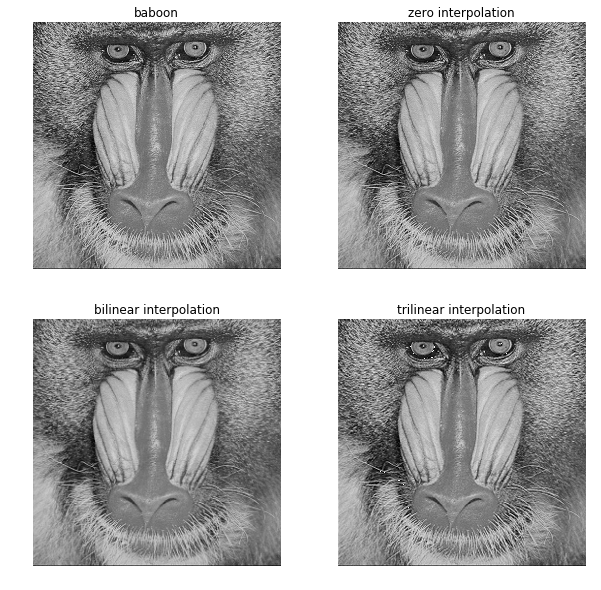

In [6]:
# 插值画图
# liyi， 2019/5/24

plt.figure(figsize=(10,10))
plt.subplot(2,2,1).set_title('baboon')
plt.imshow(img)
plt.axis('off')

plt.subplot(2,2,2).set_title('zero interpolation')
plt.imshow(img_zero)
plt.axis('off')

plt.subplot(2,2,3).set_title('bilinear interpolation')
plt.imshow(img_bilinear)
plt.axis('off')

plt.subplot(2,2,4).set_title('trilinear interpolation')
plt.imshow(img_trilinear)
plt.axis('off')

plt.savefig('img/interpolation.png')

#### 8.1 Huffman编码

In [7]:
# huffman 编码
# liyi，2019/5/24

import cv2
import numpy as np
#from collections import Counter
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

img = cv2.imread('img/lena.bmp')

#gray = Counter(img.flatten())
#print(gray)
#print(len(gray))
prob = np.array([np.sum(img==i) for i in range(256)]).astype(np.float32)
prob /= np.prod(img.shape)
gray = [[i] for i in range(256)]
codebook_huffman = ['' for i in range(256)]
assert len(prob)==len(gray)

while len(prob)>=2:
    # 按照概率排序
    data = [(p, g) for p,g in zip(prob,gray)]
    data.sort(reverse=True)
    prob = [p for p,g in data]
    gray = [g for p,g in data]
    # 取概率最小的两个编码 1 位
    for c in gray[-1]:
        codebook_huffman[c] = '0' + codebook_huffman[c]
    for c in gray[-2]:
        codebook_huffman[c] = '1' + codebook_huffman[c]
    prob[-2] += prob[-1]
    gray[-2] += gray[-1]
    prob.pop()
    gray.pop()
    assert len(prob)==len(gray)
    
#for i,c in enumerate(codebook_huffman):
#    print('%3d  '%i, c)


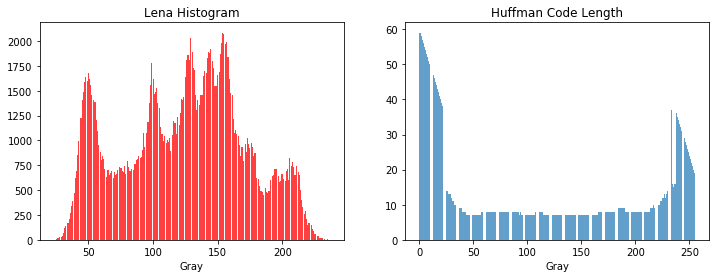

In [8]:
# huffman 编码绘图

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(img.flatten(), bins=256, color='red', normed=0, alpha=0.75)
plt.xlabel("Gray")
plt.title("Lena Histogram")

code_length_huffman = [len(c) for c in codebook_huffman]
plt.subplot(1,2,2)
plt.bar(range(len(code_length_huffman)),code_length_huffman,alpha=0.7)
plt.xlabel('Gray')
plt.title('Huffman Code Length')

plt.savefig('img/lena_huffman.png')

#### 8.2 香农-法诺编码

In [9]:
# 香农-法诺编码
# liyi，2019/5/24

import cv2
import numpy as np
#from collections import Counter
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

def shannon(probs, grays, codebook):
    assert len(probs)==len(grays)
    if len(probs)<=1:
        return codebook
    integral = np.array([sum(probs[:i+1]) for i in range(len(probs))])
    integral = abs(integral / integral[-1] - 0.5)  # integral[-1]可能为0？
    idx = np.argmin(integral)
    for g in range(idx+1):
        codebook[grays[g]] += '0'
    for g in range(idx+1, len(grays)):
        codebook[grays[g]] += '1'
    codebook = shannon(probs[0:idx+1], grays[0:idx+1], codebook)
    codebook = shannon(probs[idx+1:], grays[idx+1:], codebook)
    return codebook

img = cv2.imread('img/lena.bmp')
prob = np.array([np.sum(img==i) for i in range(256)]).astype(np.float32)
prob /= np.prod(img.shape)
gray = list(range(256))
codebook_shannon = ['' for i in range(256)]
assert len(prob)==len(gray)

data = [(p,g) for p,g in zip(prob,gray)]
data.sort(reverse=True)
codebook_shannon = shannon(prob, gray, codebook_shannon)

#for i,c in enumerate(codebook_shannon):
#    print('%3d  '%i, c)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


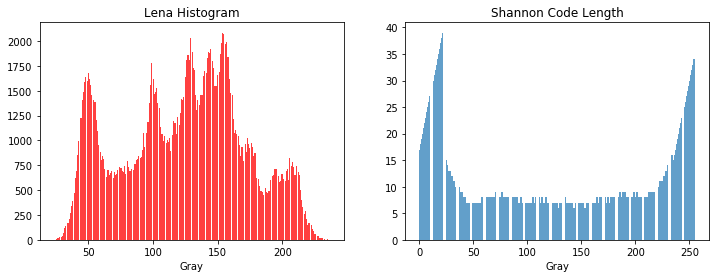

In [10]:
# 香农-法诺编码绘图

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(img.flatten(), bins=256, color='red', normed=0, alpha=0.75)
plt.xlabel("Gray")
plt.title("Lena Histogram")

code_length_shannon = [len(c) for c in codebook_shannon]
plt.subplot(1,2,2)
plt.bar(range(len(code_length_shannon)),code_length_shannon,alpha=0.7)
plt.xlabel('Gray')
plt.title('Shannon Code Length')

plt.savefig('img/lena_shannon.png')

In [11]:
# 计算熵、平均码长、编码效率
# liyi, 2019/5/25

prob = np.array([np.sum(img==i) for i in range(256)]).astype(np.float32)
prob /= np.prod(img.shape)

H = 0
H_huffman = 0
H_shannon = 0
avg_length_huffman = 0
avg_length_shannon = 0
for p,ch,cs in zip(prob,code_length_huffman,code_length_shannon):
    if p > 0:
        H += -p*np.log2(p)
    avg_length_huffman += p * ch
    avg_length_shannon += p * cs
    
ita_huffman = H / avg_length_huffman
ita_shannon = H / avg_length_shannon

print(H)
print(avg_length_huffman)
print(avg_length_shannon)
print(ita_huffman)
print(ita_shannon)

7.430862805689685
7.4548492431640625
7.47393798828125
0.99678243829057
0.994236614933238


In [12]:
# 写入excel
# liyi, 2019/5/25

import pandas as pd

data = {}
data['Distribution Probility'] = prob
data['Huffman Code'] = codebook_huffman
data['Huffman Code Length'] = code_length_huffman
data['Shannon Code'] = codebook_shannon
data['Shannon Code Length'] = code_length_shannon
frame = pd.DataFrame(data)
frame.to_excel("code.xlsx",index=True,header=True)